In [31]:
import opendatasets as od 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
od.download('https://www.kaggle.com/datasets/aaronnorman/2023-global-prosperity-index-w-region-politics/data')
data_path = '2023-global-prosperity-index-w-region-politics/global_prosperity_regions_politics.csv'

df = pd.read_csv(data_path)
df.head()

Skipping, found downloaded files in "./2023-global-prosperity-index-w-region-politics" (use force=True to force download)


,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,Denmark,DNK,Europe,Liberal democracy,6.00,6.0,2.0,3.0,1.0,8.0,8.0,9.0,7.0,2.0,16.0,5.0,5.0
1,Sweden,SWE,Europe,Liberal democracy,6.83,10.0,4.0,7.0,4.0,6.0,15.0,7.0,8.0,3.0,9.0,8.0,1.0
2,Norway,NOR,Europe,Liberal democracy,7.25,3.0,1.0,2.0,3.0,9.0,14.0,20.0,5.0,4.0,7.0,10.0,9.0
3,Finland,FIN,Europe,Liberal democracy,8.00,15.0,3.0,1.0,7.0,2.0,12.0,10.0,20.0,7.0,15.0,2.0,2.0
4,Switzerland,CHE,Europe,Liberal democracy,6.75,2.0,12.0,4.0,12.0,12.0,1.0,11.0,2.0,5.0,10.0,4.0,6.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           159 non-null    object 
 1   code                              159 non-null    object 
 2   region                            159 non-null    object 
 3   political_regime                  159 non-null    object 
 4   average_score                     159 non-null    float64
 5   safety_and_security               159 non-null    float64
 6   personal_freedom                  159 non-null    float64
 7   governance                        159 non-null    float64
 8   social_capital                    159 non-null    float64
 9   investment_environment            159 non-null    float64
 10  enterprise_conditions             159 non-null    float64
 11  infrastructure_and_market_access  159 non-null    float64
 12  economic

In [4]:
df.isnull().sum()

country                             0
code                                0
region                              0
political_regime                    0
average_score                       0
safety_and_security                 0
personal_freedom                    0
governance                          0
social_capital                      0
investment_environment              0
enterprise_conditions               0
infrastructure_and_market_access    0
economic_quality                    0
living_conditions                   0
health                              0
education                           0
natural_environment                 0
dtype: int64

In [5]:
df['political_regime'].unique()

array(['Liberal democracy', 'Electoral democracy', 'Electoral autocracy',
       'Closed autocracy'], dtype=object)

In [6]:
df['region'].value_counts()

region
Africa           48
Europe           41
Asia             41
South America    14
North America    12
Oceania           3
Name: count, dtype: int64

In [7]:
a = df.groupby(by='political_regime')['living_conditions'].describe()
a.head()

,count,mean,std,min,25%,50%,75%,max
political_regime,,,,,,,,
Closed autocracy,32.0,107.781250,42.841594,27.0,73.00,107.0,149.50,166.0
Electoral autocracy,48.0,106.520833,40.252918,14.0,72.25,117.0,139.25,167.0
Electoral democracy,50.0,78.360000,38.057293,12.0,50.25,79.5,106.25,155.0
Liberal democracy,29.0,22.068966,18.732956,1.0,8.00,18.0,29.00,72.0


In [34]:
b = df.groupby(by='political_regime')['average_score'].mean()

<Axes: title={'center': 'Зависимость индекса процветания от политического режима в стране'}, xlabel='Political regime'>

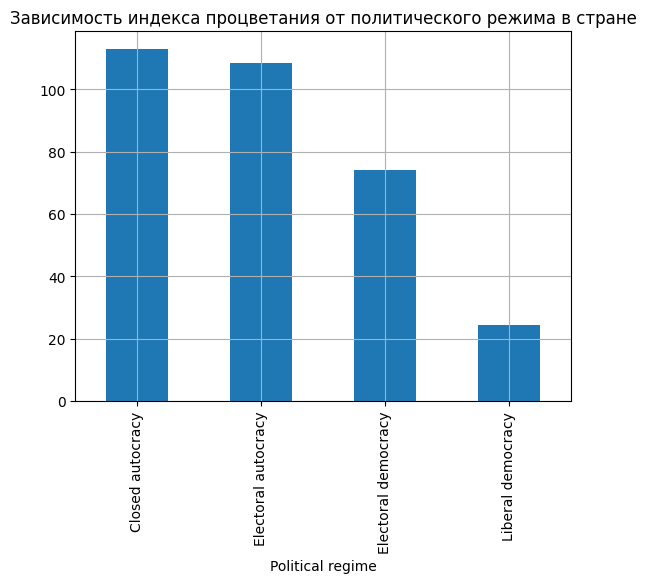

In [10]:
b.plot(kind='bar',
       grid=True, 
       title='Зависимость индекса процветания от политического режима в стране',
       xlabel='Political regime',
       rot='vertical',
       )

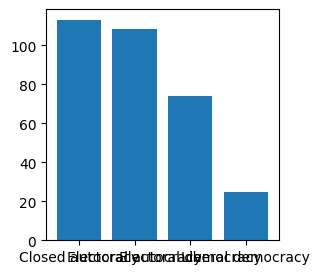

In [35]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.bar(b.index, b)
plt.show()

In [33]:
df.sort_values(by='average_score', ascending=True)

,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,Denmark,DNK,Europe,Liberal democracy,6.00,6.0,2.0,3.0,1.0,8.0,8.0,9.0,7.0,2.0,16.0,5.0,5.0
4,Switzerland,CHE,Europe,Liberal democracy,6.75,2.0,12.0,4.0,12.0,12.0,1.0,11.0,2.0,5.0,10.0,4.0,6.0
1,Sweden,SWE,Europe,Liberal democracy,6.83,10.0,4.0,7.0,4.0,6.0,15.0,7.0,8.0,3.0,9.0,8.0,1.0
2,Norway,NOR,Europe,Liberal democracy,7.25,3.0,1.0,2.0,3.0,9.0,14.0,20.0,5.0,4.0,7.0,10.0,9.0
3,Finland,FIN,Europe,Liberal democracy,8.00,15.0,3.0,1.0,7.0,2.0,12.0,10.0,20.0,7.0,15.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Eritrea,ERI,Africa,Closed autocracy,151.38,137.0,166.0,163.0,158.0,144.0,152.0,161.0,156.0,162.0,135.0,153.0,130.0
154,Somalia,SOM,Africa,Closed autocracy,153.62,160.0,141.0,161.0,143.0,153.0,140.0,165.0,165.0,159.0,163.0,158.0,136.0
155,Afghanistan,AFG,Asia,Closed autocracy,154.25,166.0,148.0,149.0,166.0,154.0,139.0,159.0,152.0,153.0,153.0,157.0,155.0
157,Yemen,YEM,Asia,Closed autocracy,156.88,165.0,159.0,166.0,157.0,165.0,160.0,156.0,164.0,148.0,136.0,155.0,152.0


In [48]:
c = df.iloc[:, 4:]
c

,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,6.00,6.0,2.0,3.0,1.0,8.0,8.0,9.0,7.0,2.0,16.0,5.0,5.0
1,6.83,10.0,4.0,7.0,4.0,6.0,15.0,7.0,8.0,3.0,9.0,8.0,1.0
2,7.25,3.0,1.0,2.0,3.0,9.0,14.0,20.0,5.0,4.0,7.0,10.0,9.0
3,8.00,15.0,3.0,1.0,7.0,2.0,12.0,10.0,20.0,7.0,15.0,2.0,2.0
4,6.75,2.0,12.0,4.0,12.0,12.0,1.0,11.0,2.0,5.0,10.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,153.62,160.0,141.0,161.0,143.0,153.0,140.0,165.0,165.0,159.0,163.0,158.0,136.0
155,154.25,166.0,148.0,149.0,166.0,154.0,139.0,159.0,152.0,153.0,153.0,157.0,155.0
156,150.38,157.0,135.0,155.0,160.0,160.0,149.0,166.0,130.0,167.0,167.0,165.0,93.0
157,156.88,165.0,159.0,166.0,157.0,165.0,160.0,156.0,164.0,148.0,136.0,155.0,152.0


In [49]:
correlation_matrix = c.corr()
print(correlation_matrix)

                                  average_score  safety_and_security  \
average_score                          1.000000             0.845574   
safety_and_security                    0.845574             1.000000   
personal_freedom                       0.767980             0.658812   
governance                             0.907505             0.774011   
social_capital                         0.761514             0.584595   
investment_environment                 0.940161             0.748901   
enterprise_conditions                  0.877270             0.688146   
infrastructure_and_market_access       0.948940             0.757677   
economic_quality                       0.904880             0.738819   
living_conditions                      0.926303             0.784107   
health                                 0.889250             0.716170   
education                              0.919954             0.763891   
natural_environment                    0.689914             0.56

<Axes: >

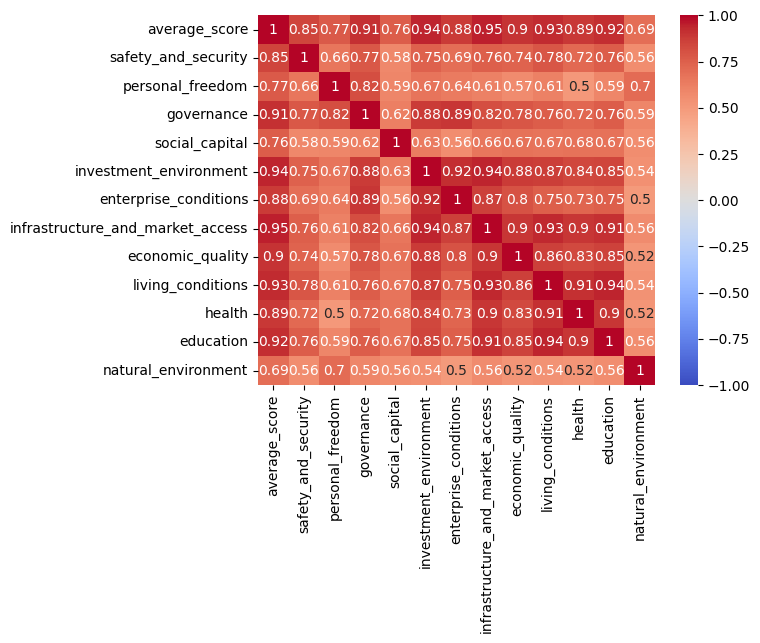

In [68]:
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')